# TV Show Rating Predictions

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("data/tv_ratings.csv")

In [4]:
df.describe()

,CharacterDevelopment,EpisodeDuration,Budget,Cliffhangers,PlotTwists,EpisodeBinging,HiatusDuration,RottenTomatoesRating,IMDbRating
count,2000.000000,2000.000000,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,6.453359,53.524346,4.911279e+08,3.241836,3.223824,6.779588,5.530469,64.883366,6.473372
std,1.530894,1.556759,2.872916e+08,0.876319,0.896664,0.879797,1.539126,15.209309,1.459919
min,1.713644,49.070110,1.206742e+06,0.438076,0.288984,4.041442,0.829439,14.962457,1.930785
25%,5.419694,52.491888,2.418776e+08,2.618987,2.611129,6.171359,4.530477,54.475683,5.471852
50%,6.461225,53.548333,4.822508e+08,3.224146,3.213190,6.770525,5.511676,64.733494,6.476404
75%,7.522125,54.556270,7.370849e+08,3.821349,3.826086,7.397754,6.553606,75.005665,7.422012
max,10.000000,59.121907,9.997944e+08,6.198193,6.027658,9.704884,10.623170,100.000000,10.000000


In [6]:
X = df[[
    'CharacterDevelopment',
    'EpisodeDuration',
    'Budget',
    'Cliffhangers',
    'PlotTwists',
    'EpisodeBinging',
    'HiatusDuration',
    'RottenTomatoesRating']]
Y = df['IMDbRating']

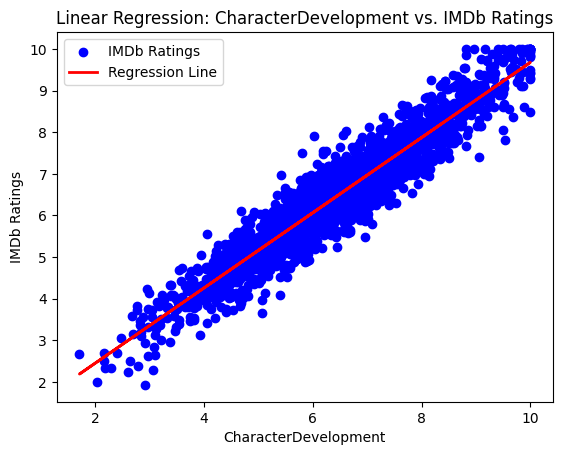

R-squared (CharacterDevelopment): 0.8973465363278933
Slope (coefficient): 0.9033660601416144
Intercept: 0.643625983507687


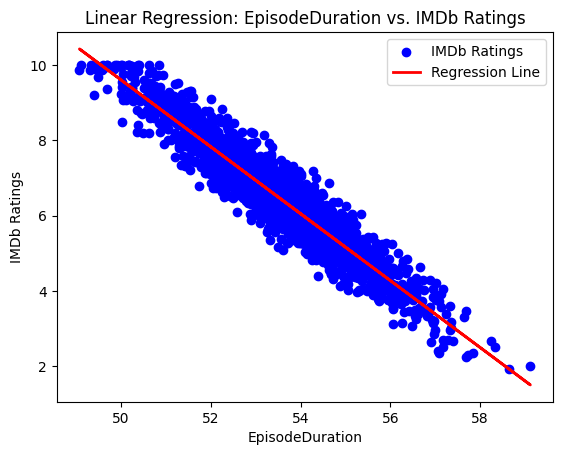

R-squared (EpisodeDuration): 0.8987393947709362
Slope (coefficient): -0.8890464209439353
Intercept: 54.05900035249068


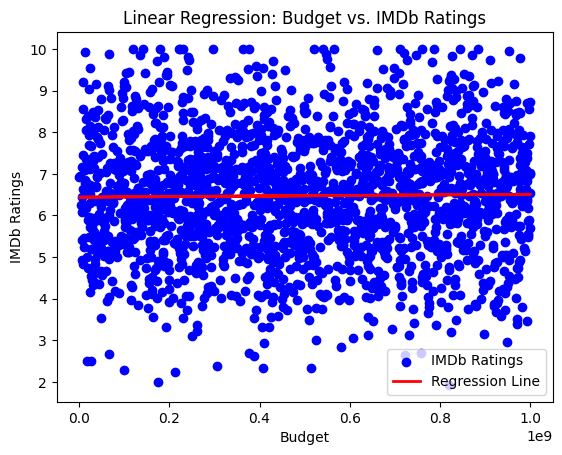

R-squared (Budget): 0.00018153045637181453
Slope (coefficient): 6.84669076003386e-11
Intercept: 6.439745806817646


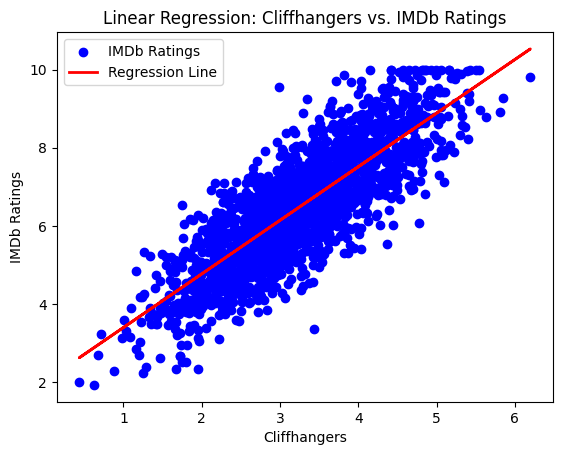

R-squared (Cliffhangers): 0.6774221686852968
Slope (coefficient): 1.3711866650115883
Intercept: 2.028209180410185


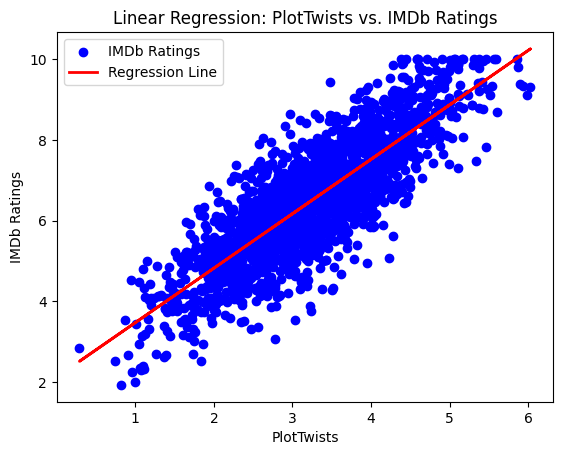

R-squared (PlotTwists): 0.6860409046210276
Slope (coefficient): 1.3485723003058017
Intercept: 2.125812673233317


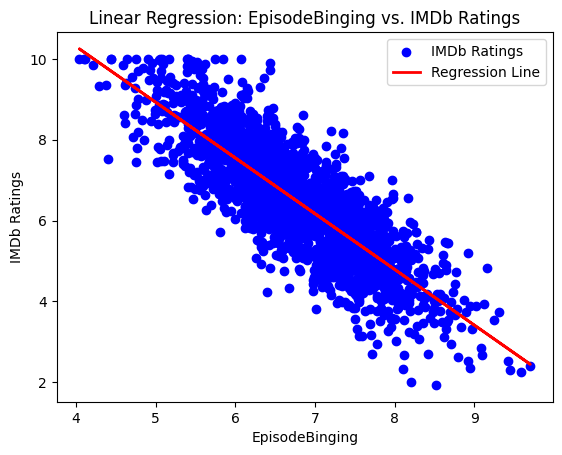

R-squared (EpisodeBinging): 0.6902024021408804
Slope (coefficient): -1.3785879582396836
Intercept: 15.819630661442996


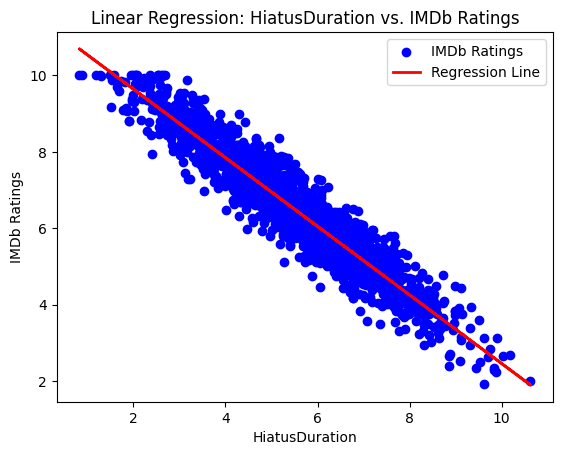

R-squared (HiatusDuration): 0.8957795551103497
Slope (coefficient): -0.8977494895384117
Intercept: 11.438347874008786


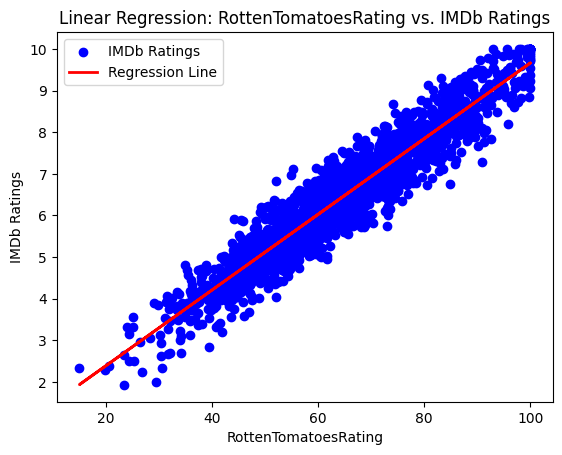

R-squared (RottenTomatoesRating): 0.8956524499392424
Slope (coefficient): 0.09084252074783862
Intercept: 0.5792032911908365


In [12]:
# Print the R-squared values for each predictor
for i, predictor in enumerate(X.columns.tolist()):
    # Create and fit the lin reg model
    model = LinearRegression()
    model.fit(X[[predictor]], Y)

    # plotting line of best fit
    predictions = model.predict(X[[predictor]])

    # Plot the data and the regression line
    plt.scatter(X[[predictor]], Y, color='blue', label='IMDb Ratings')
    plt.plot(X[[predictor]], predictions, color='red', linewidth=2, label='Regression Line')
    plt.xlabel(f"{predictor}")
    plt.ylabel(f"IMDb Ratings")
    plt.title(f"Linear Regression: {predictor} vs. IMDb Ratings")
    plt.legend()
    plt.show()

    # print statements
    r_squared = model.score(X[[predictor]], Y)
    print(f"R-squared ({predictor}): {r_squared}") 
    print("Slope (coefficient):", model.coef_[0])
    print("Intercept:", model.intercept_)
